# Pymaceuticals Inc.
---

### Analysis
The data provided and analyzed highlights drugs that would help treat skin cancer in mice. As seen through a linear regression model, it is observed that there is a correlation between the mouse weight and average tumor volume at 0.84 with the Capomulin regimen. Of the four drugs used Infubinol was the only one that had an outlier. Another observation found was that a mouse that used Capomulin over a 40 day stretch saw it's tumor rapidly lower between the 20th and 35th days of usage.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID'])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(combined_data['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data.drop(duplicate_mice_data.index)
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume = pd.DataFrame({'Mean Tumor Volume': tumor_volume_mean, 'Median Tumor Volume': tumor_volume_median,
                             'Tumor Volume Variance': tumor_volume_variance, 'Tumor Volume Std. Dev.': tumor_volume_std, 
                             'Tumor Volume Std. Err.': tumor_volume_sem
})
tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

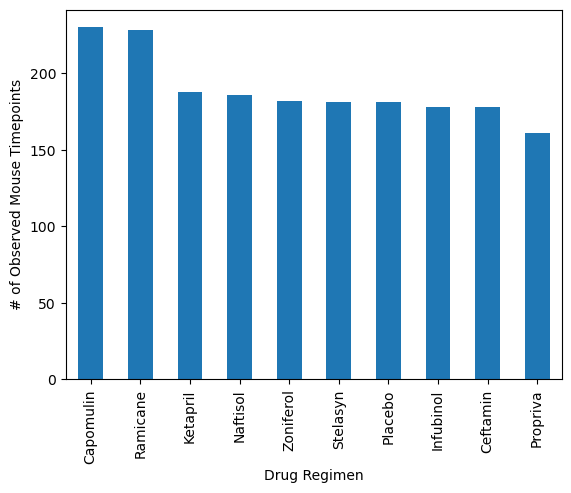

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Regiment_Bar = combined_data['Drug Regimen'].value_counts()
Drug_Regiment_Bar.plot(kind= 'bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

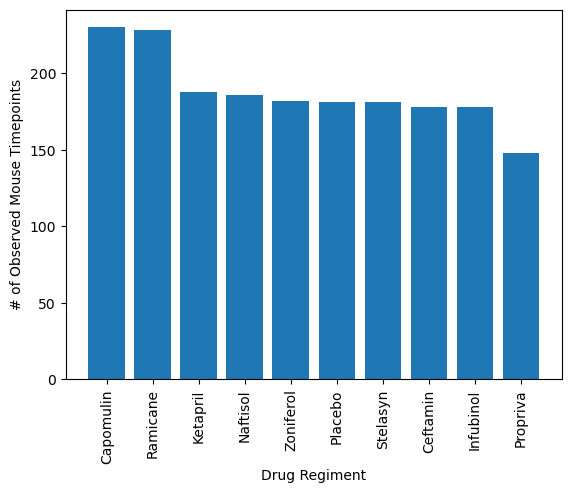

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regiment_Bar = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

# plotting the graph
plt.bar(Drug_Regiment_Bar.index, Drug_Regiment_Bar)
plt.xlabel('Drug Regiment')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 'vertical')
plt.show

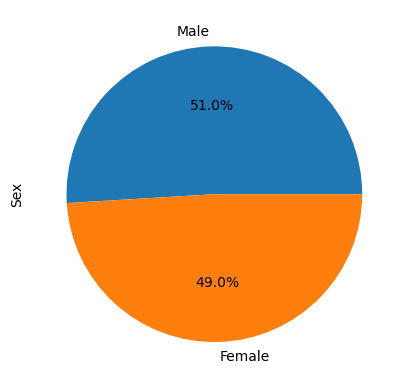

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_sex = cleaned_df['Sex'].value_counts()

# Make the pie chart
plot_mice_sex = mice_sex.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

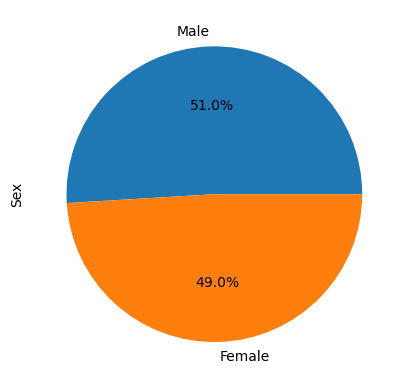

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
labels = ['Male', 'Female']

# Make the pie chart
plt.pie(mice_sex, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_four_tumor_regimens = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
original_df_merged = pd.merge(cleaned_df, final_four_tumor_regimens, on=['Mouse ID', 'Timepoint'], how='outer')
original_df_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for drugs in treatments:
    treatment_data = original_df_merged[original_df_merged['Drug Regimen'] == drugs]
    tumor_vol = treatment_data['Tumor Volume (mm3)']

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * IQR)
    upper_bound = upper_quartile + (1.5 * IQR)

    # add subset
    tumor_vol_data.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print
    print(f"{drugs}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1639    25.472143
1836    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1801    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


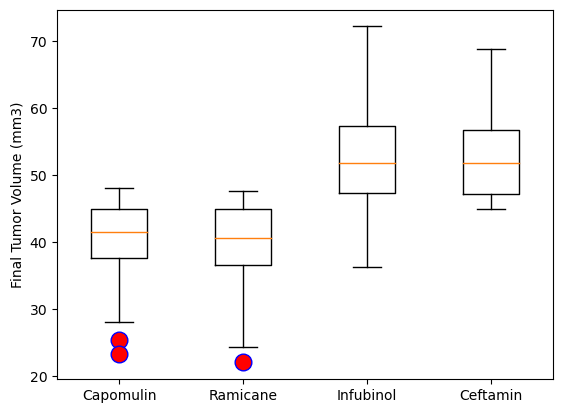

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize='12', markeredgecolor='b'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

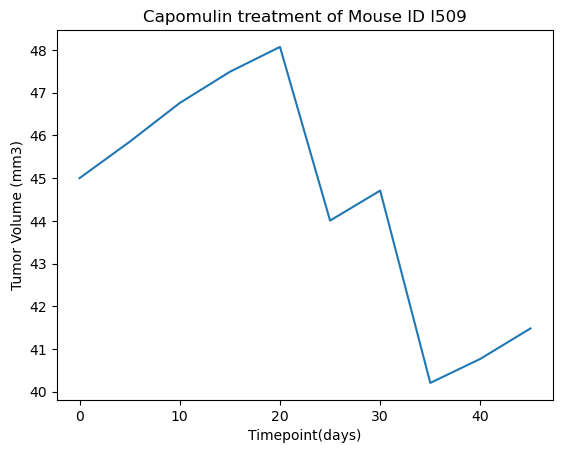

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') 
                            & (cleaned_df['Mouse ID'] == 'l509')]

#plot line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse ID l509')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

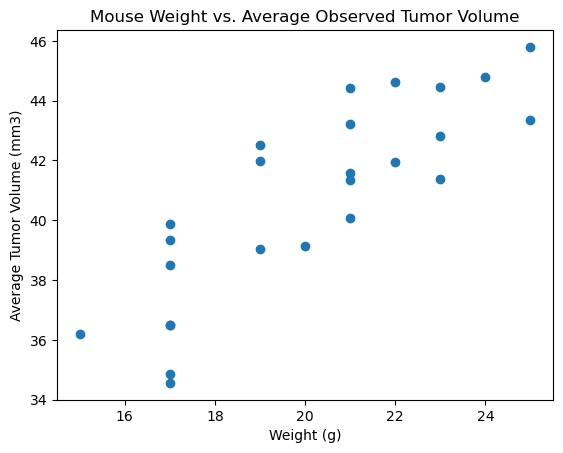

In [17]:
### Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# avg tumor volume
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean',
                                                              'Tumor Volume (mm3)': 'mean'})

# scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume')
plt.show

## Correlation and Regression

The correlation between the mouse weight and average tumor volume is 0.84


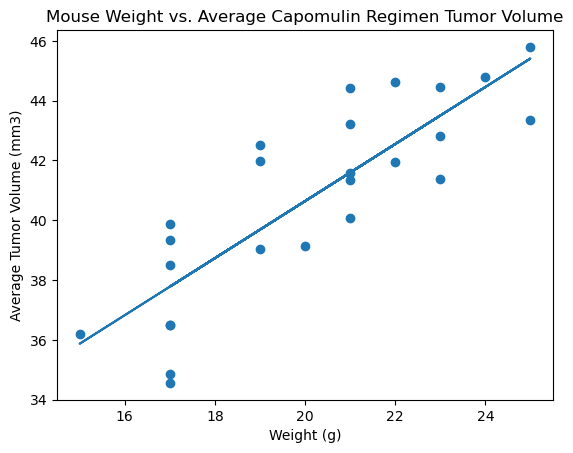

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(average_tumor_volume['Weight (g)'], 
                                                       average_tumor_volume['Tumor Volume (mm3)'])
regress_values = average_tumor_volume * slope + intercept

plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.plot(average_tumor_volume['Weight (g)'], slope * average_tumor_volume['Weight (g)'] + intercept)

#labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Capomulin Regimen Tumor Volume')
plt.show

correlation_coefficient = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between the mouse weight and average tumor volume is {correlation_coefficient:.2f}")